# Clustering Analysis using Breast Cancer dataset

In [1]:
import tarfile
import urllib
   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
# import the 'Breast Cancer' dataset from sklearn as below
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print(len(cancer['feature_names']))


feature = pd.DataFrame(cancer.data,columns =[cancer.feature_names])
target = pd.Series(data=cancer.target,index=df.index)

feature[5, :2]


In [50]:
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

print(len(cancer['feature_names']))

feature = pd.DataFrame(cancer.data,columns =[cancer.feature_names]) 
target = pd.Series(data=cancer.target,index=feature.index)

print(cancer.feature_names)
print(cancer.target)
#feature[:5]
#target[:5]


30
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 

In [3]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(target)

true_labels[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [53]:
print(label_encoder.classes_)
#Out[9]: array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='<U4')

n_clusters = len(label_encoder.classes_)
n_clusters

[0 1]


2

In [5]:
feature_scale = preprocessing.scale(feature)
#feature_scale


In [6]:
# Create 2 clusters for the dataset using KMeans clustering

In [52]:
k_means = KMeans(n_clusters=2)
k_means.fit(feature_scale) 
labels = k_means.labels_
#print(labels)

In [47]:
# Predict the cluster for all the samples
P = k_means.predict(feature_scale)
#print(P)
print(sm.accuracy_score(target,k_means.labels_))

0.9103690685413005


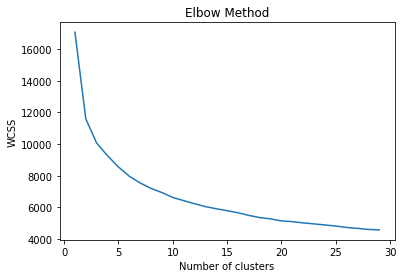

In [45]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(feature_scale)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# visualise the KMeans clusters
#import matplotlib.pyplot as plt
#%matplotlib inline

#colors = ['green','red']

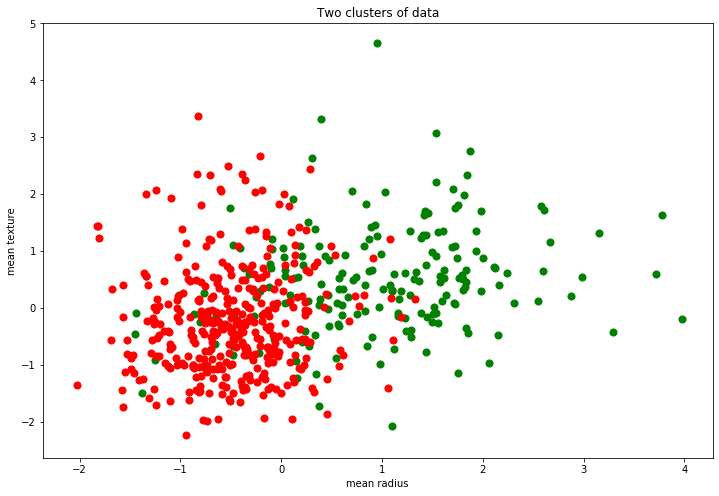

In [10]:
fig = plt.figure(1, figsize=(12, 8))

plt.scatter(feature_scale[P==0, 0], feature_scale[P==0, 1], s=50, c='green')
plt.scatter(feature_scale[P==1, 0], feature_scale[P==1, 1], s=50, c='red')

plt.title('Two clusters of data')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

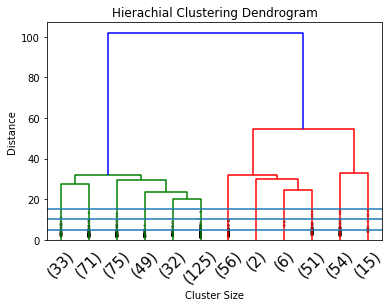

In [46]:
#generate dendrogram
z = linkage(feature_scale,"ward")
dendrogram(z,truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
plt.title("Hierachial Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
#divide the cluster
plt.axhline(y=15)
plt.axhline(5)
plt.axhline(10)
plt.show()

In [13]:
# Create Hierarchicial clustering model using linkages : {“ward”, “complete”, “average”}

In [54]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
#build the model
HClustering1 = AgglomerativeClustering(n_clusters=3 , affinity="euclidean",linkage="ward")
HClustering2 = AgglomerativeClustering(n_clusters=3 , affinity="euclidean",linkage="complete")
HClustering3 = AgglomerativeClustering(n_clusters=3 , affinity="euclidean",linkage="average")

#fit the model on the dataset
HClustering1.fit(feature_scale)
HClustering2.fit(feature_scale)
HClustering3.fit(feature_scale)
#accuracy of the model
print(sm.accuracy_score(target,HClustering1.labels_))
print(sm.accuracy_score(target,HClustering2.labels_))
print(sm.accuracy_score(target,HClustering3.labels_))

0.6783831282952548
0.3602811950790861
0.6291739894551845


In [55]:
# Predict the cluster for all the samples
p1 =HClustering1.fit_predict(feature_scale, y=None)
#p2 =HClustering2.fit_predict(feature_scale, y=None)
#p3 =HClustering3.fit_predict(feature_scale, y=None)
#P2 = HClustering1.predict(feature_scale)
#print(p2)

In [38]:
#visualize the clusters

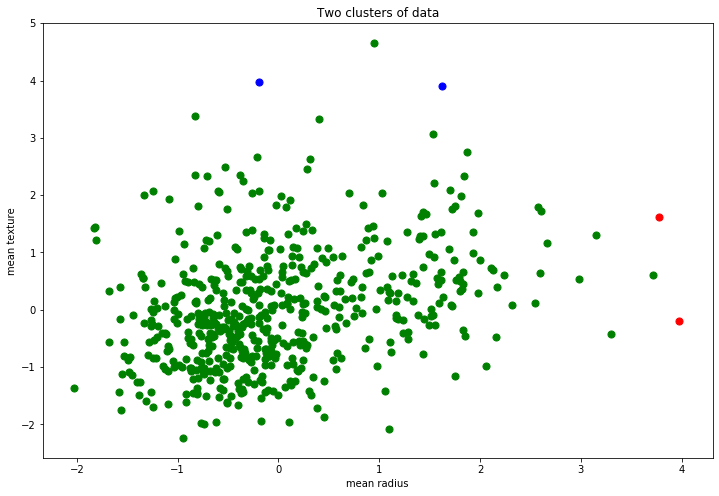

In [60]:
fig = plt.figure(1, figsize=(12, 8))

plt.scatter(feature_scale[p2==0, 0], feature_scale[p2==0, 1], s=50, c='green')
plt.scatter(feature_scale[p2==1, 0], feature_scale[p2==1, 1], s=50, c='red')
plt.scatter(feature_scale[p2==1, 1], feature_scale[p2==1, 2], s=50, c='blue')

plt.title('Two clusters of data')
plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.show()

In [34]:
# Compare the results

In [ ]:
# The value of r-score for k-means is 0.91 which is better than the Hierarchicial clustering (ward - 0.67) r-core value. we can also 
# see from each diagram that k-means show better clustering than Hierarchical clustering. In k-mean clustering there were only two 
# we found from the elbow method but for other, number of clusters were three (found from the dedogram)